In [14]:
!jt -t chesterish


In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
##pd.options.display.max_columns = None ### shows all columns
error_bad_lines = False
df=pd.read_csv('ERPdata.csv')

[]


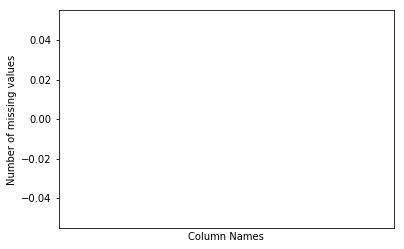

In [2]:
### count of missing data in each column and bar graph
df.columns
missing_values=[]
missing_cols=[]
for i in df.columns:
    if (len(df) - df[i].count()>0):
        missing_values.append(len(df) - df[i].count())
        missing_cols.append(i)
k=dict(zip(missing_cols,missing_values))
print(sorted(k.items()))
plt.bar(missing_cols,missing_values)
plt.xlabel('Column Names')
plt.ylabel('Number of missing values')
plt.xticks(missing_cols, missing_cols, rotation='vertical')
plt.show()

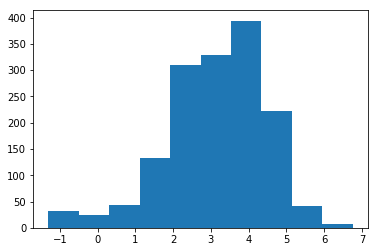

In [2]:
cond1_before=df[(df.subject==1) & (df.condition==1) & (df.time_ms<0)]
cond1_after=df[(df.subject==1) & (df.condition==1) & (df.time_ms>=0)]
plt.hist(cond1_before.Fz)
plt.show()

### Average ERP for different electrodes

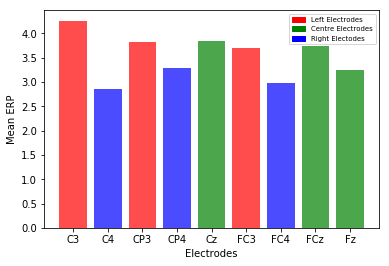

In [114]:
import matplotlib.patches as mpatches
cond1=df[(df.subject==1) & (df.condition==1)]
columns=['FC3','C3','CP3','Fz','FCz','Cz','FC4','C4','CP4']
mean_ERP=[]
for m in columns:
    mean_ERP.append(np.mean(cond1[m]))
#print(mean_ERP)
plt.bar(columns,mean_ERP,alpha=0.7,color=['red','red','red','green','green','green','blue','blue','blue'])
plt.xlabel('Electrodes')
plt.ylabel('Mean ERP')
left_elec = mpatches.Patch(color='red', label='Left Electrodes')
Centre_elec = mpatches.Patch(color='green', label='Centre Electrodes')
Right_elec = mpatches.Patch(color='blue', label='Right Electodes')
plt.legend(handles=[left_elec,Centre_elec,Right_elec],fontsize = 'x-small')
plt.show()

    

### Averge ERP Before Event vs After Event

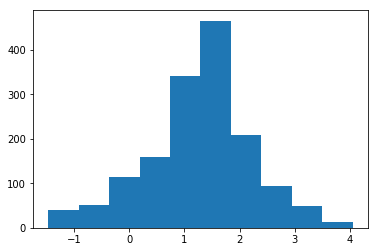

In [10]:
cond1_before=df[(df.subject==1) & (df.condition==3) & (df.time_ms<0)]
cond1_after=df[(df.subject==1) & (df.condition==3) & (df.time_ms>=0)]
plt.hist(cond1_before.Fz)
plt.show()

In [11]:
Mean_ERP_before=[]
Mean_ERP_after=[]
columns=[ 'Fz', 'FCz', 'Cz', 'FC3', 'FC4', 'C3', 'C4',
       'CP3', 'CP4']
for j in columns:
    Mean_ERP_before.append(np.mean(cond1_before[j]))
    Mean_ERP_after.append(np.mean(cond1_after[j]))
    #print(j,np.mean(cond1_before[j]))
    #print(j,np.mean(cond1_after[j])) 
    
    

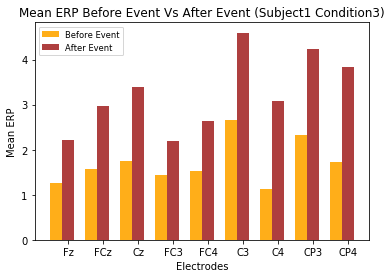

In [14]:
# data to plot
n_groups = 9

# creating subplots
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.9

rects1 = plt.bar(index,Mean_ERP_before, bar_width,    
alpha=opacity,
color='orange',
label='Before Event')


rects2 = plt.bar(index + bar_width , Mean_ERP_after , bar_width,   
alpha=opacity,
color='brown',
label='After Event')

plt.xlabel('Electrodes')
plt.ylabel('Mean ERP')
plt.title('Mean ERP Before Event Vs After Event (Subject1 Condition3)')
plt.xticks(index + bar_width,('Fz','FCz','Cz','FC3','FC4','C3','C4','CP3','CP4'))
plt.legend(loc=2,fontsize = 'small')
plt.show()

### Box Plots

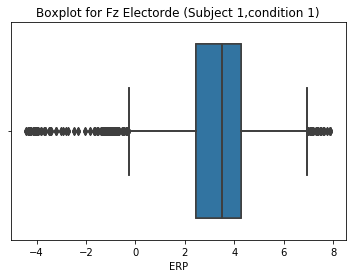

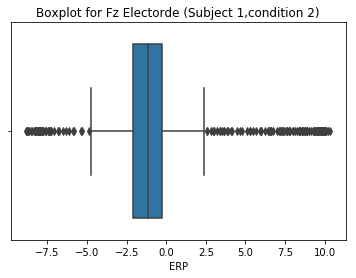

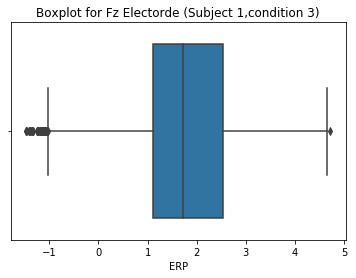

In [164]:
for k in range (1,4):
        Titles=['Boxplot for Fz Electorde (Subject 1,condition 1)','Boxplot for Fz Electorde (Subject 1,condition 2)',
                'Boxplot for Fz Electorde (Subject 1,condition 3)']
        sub1condk=df[(df.subject==1) & (df.condition==k)]
        sns.boxplot(sub1condk.Fz)
        plt.xlabel('ERP')
        plt.title(Titles[k-1])
        plt.show()

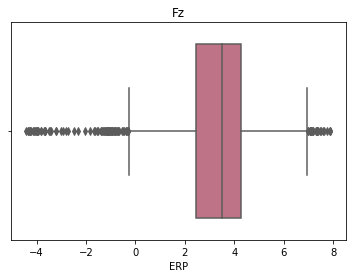

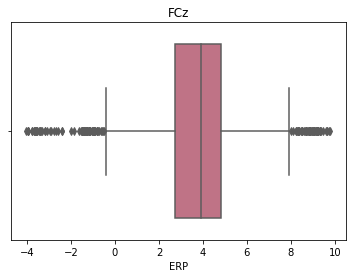

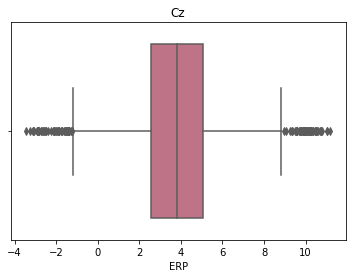

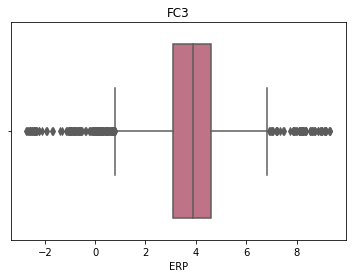

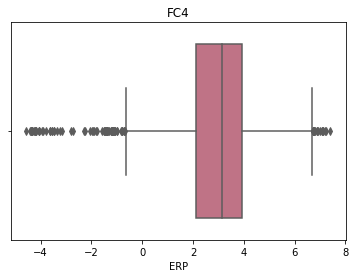

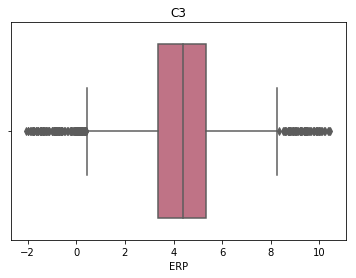

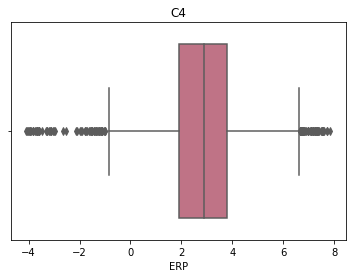

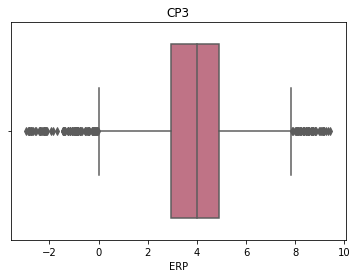

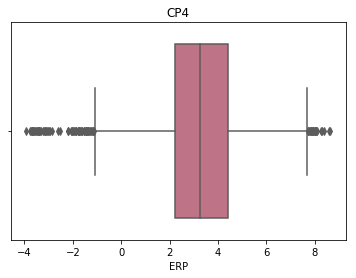

In [159]:
columns=[ 'Fz', 'FCz', 'Cz', 'FC3', 'FC4', 'C3', 'C4',
       'CP3', 'CP4']
for k in columns:
        #Titles=['Boxplot for Fz Electorde (Subject 1,condition 1)','Boxplot for Fz Electorde (Subject 1,condition 2)',
               # 'Boxplot for Fz Electorde (Subject 1,condition 3)']
        fig, axes = plt.subplots()
        sub1cond1=df[(df.subject==1) & (df.condition==1)]
        sns.boxplot(sub1cond1[k],color=[0.8,0.4,0.5])
        plt.xlabel('ERP')
        plt.title(k)
        plt.show()

### Histograms

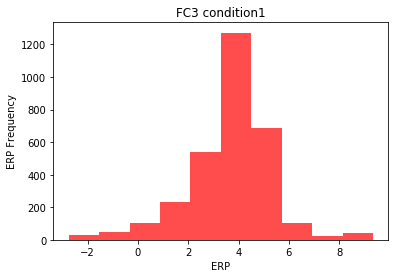

In [209]:

sub1cond1=df[(df.subject==1) & (df.condition==1)]
sub1cond2=df[(df.subject==1) & (df.condition==2)]
sub1cond3=df[(df.subject==1) & (df.condition==3)]
plt.hist(sub1cond1.FC3,alpha=0.7,color='red')


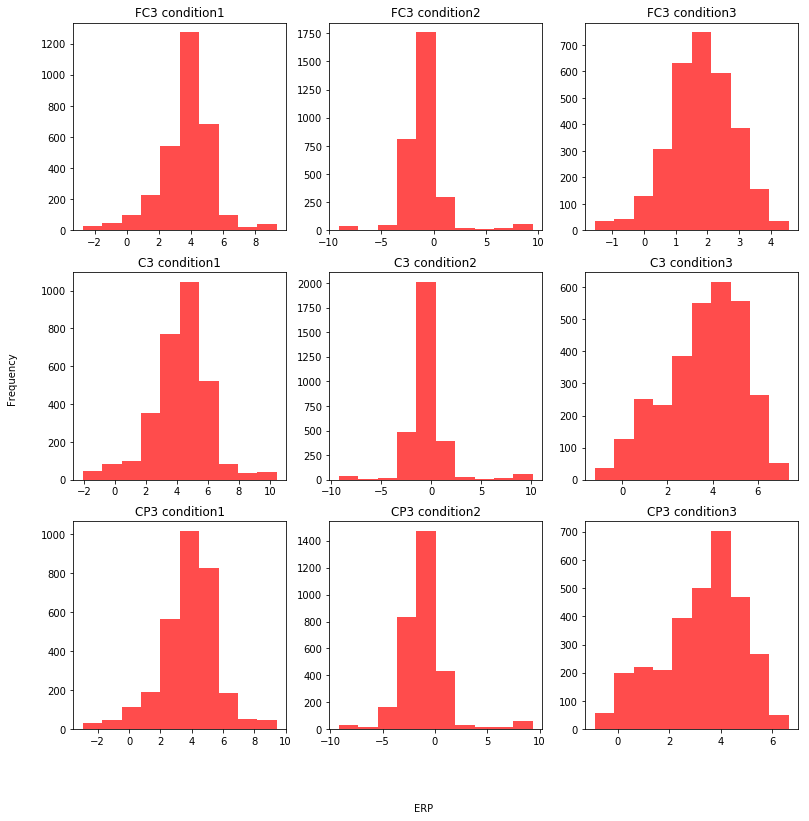

In [270]:
fig, ax = plt.subplots(3, 3,figsize=(13,13))
ax[0, 0].hist(sub1cond1.FC3,alpha=0.7,color='red') 
ax[0,0].title.set_text('FC3 condition1')
ax[0,1].hist(sub1cond2.FC3,alpha=0.7,color='red')
ax[0,1].title.set_text('FC3 condition2')
ax[0,2].hist(sub1cond3.FC3,alpha=0.7,color='red')
ax[0,2].title.set_text('FC3 condition3')
ax[1,0].hist(sub1cond1.C3,alpha=0.7,color='red') 
ax[1,0].title.set_text('C3 condition1')
ax[1,1].hist(sub1cond2.C3,alpha=0.7,color='red')
ax[1,1].title.set_text('C3 condition2')
ax[1,2].hist(sub1cond3.C3,alpha=0.7,color='red')
ax[1,2].title.set_text('C3 condition3')
ax[2,0].hist(sub1cond1.CP3,alpha=0.7,color='red') 
ax[2,0].title.set_text('CP3 condition1')
ax[2,1].hist(sub1cond2.CP3,alpha=0.7,color='red')
ax[2,1].title.set_text('CP3 condition2')
ax[2,2].hist(sub1cond3.CP3,alpha=0.7,color='red')
ax[2,2].title.set_text('CP3 condition3')
fig.text(0.5, 0.04, 'ERP', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
plt.show()

#plt.tight_layout()

### Line Graphs against Time

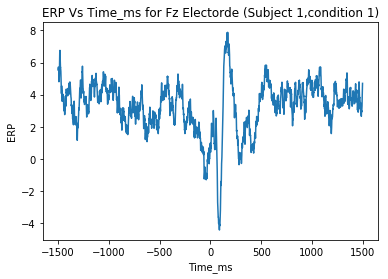

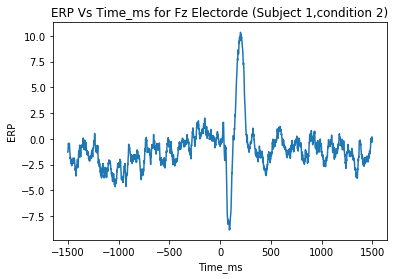

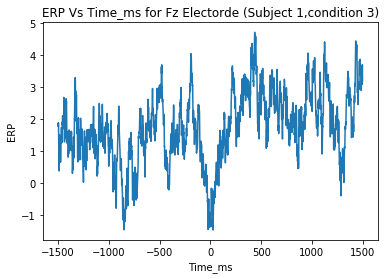

In [83]:
for k in range (1,4):
        Titles=['ERP Vs Time_ms for Fz Electorde (Subject 1,condition 1)','ERP Vs Time_ms for Fz Electorde (Subject 1,condition 2)',
                'ERP Vs Time_ms for Fz Electorde (Subject 1,condition 3)']
        sub1condk=df[(df.subject==1) & (df.condition==k)]
        plt.plot(sub1condk.time_ms,sub1condk.Fz)
        plt.xlabel('Time_ms')
        plt.ylabel('ERP')
        plt.title(Titles[k-1])
        plt.show()

### Comparision between Left right and centere electrodes

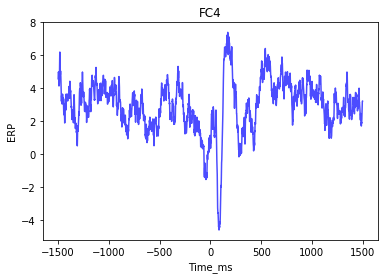

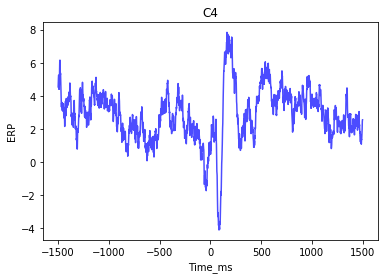

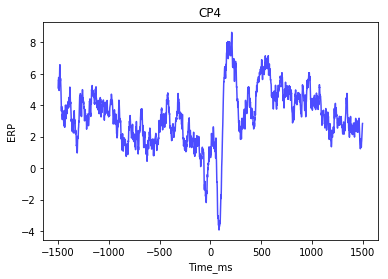

In [123]:
Left_elec=['FC3','C3','CP3']
Centre_elec=['Fz','FCz','Cz']
Right_elec=['FC4','C4','CP4']
for k in Right_elec:
        sub1cond1=df[(df.subject==1) & (df.condition==1)]
        plt.plot(sub1cond1.time_ms,sub1cond1[k],color='blue',alpha=0.7)
        plt.xlabel('Time_ms')
        plt.ylabel('ERP')
        plt.title(k)
        plt.show()

In [20]:
left_elec=['FC3','C3','CP3']
Centre_elec=['Fz','FCz','Cz']
Right_elec=['FC4','C4','CP4']
sub1cond1=df[(df.subject==1) & (df.condition==1)]
sub1cond2=df[(df.subject==1) & (df.condition==2)]
sub1cond3=df[(df.subject==1) & (df.condition==3)]

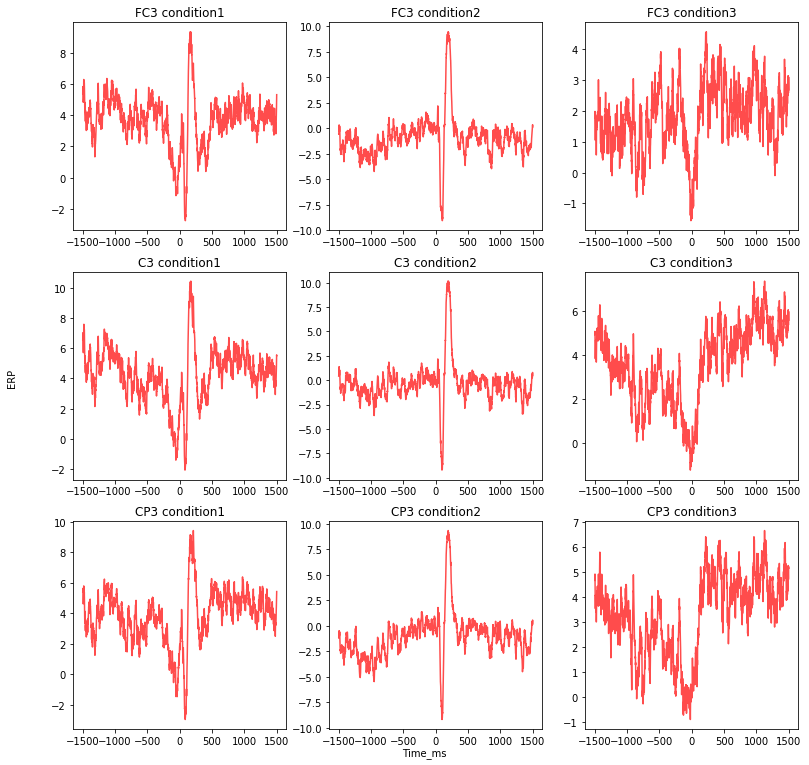

In [24]:
fig, ax = plt.subplots(3, 3,figsize=(13,13))
ax[0, 0].plot(sub1cond1.time_ms,sub1cond1.FC3,alpha=0.7,color='red') 
ax[0,0].title.set_text('FC3 condition1')
ax[0,1].plot(sub1cond1.time_ms,sub1cond2.FC3,alpha=0.7,color='red')
ax[0,1].title.set_text('FC3 condition2')
ax[0,2].plot(sub1cond1.time_ms,sub1cond3.FC3,alpha=0.7,color='red')
ax[0,2].title.set_text('FC3 condition3')
ax[1,0].plot(sub1cond1.time_ms,sub1cond1.C3,alpha=0.7,color='red') 
ax[1,0].title.set_text('C3 condition1')
ax[1,1].plot(sub1cond1.time_ms,sub1cond2.C3,alpha=0.7,color='red')
ax[1,1].title.set_text('C3 condition2')
ax[1,2].plot(sub1cond1.time_ms,sub1cond3.C3,alpha=0.7,color='red')
ax[1,2].title.set_text('C3 condition3')
ax[2,0].plot(sub1cond1.time_ms,sub1cond1.CP3,alpha=0.7,color='red') 
ax[2,0].title.set_text('CP3 condition1')
ax[2,1].plot(sub1cond1.time_ms,sub1cond2.CP3,alpha=0.7,color='red')
ax[2,1].title.set_text('CP3 condition2')
ax[2,2].plot(sub1cond1.time_ms,sub1cond3.CP3,alpha=0.7,color='red')
ax[2,2].title.set_text('CP3 condition3')
fig.text(0.5, 0.1, 'Time_ms', ha='center', va='center')
fig.text(0.06, 0.5, 'ERP', ha='center', va='center', rotation='vertical')
#plt.legend(0.5, 0.1,handles=[left_elec,Centre_elec,Right_elec],fontsize = 'x-small')
plt.show()